In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Continuing from Project_analysis.ipynb,

After doing some analysis with respect to the various labels in the peredicted data. I will now perfrom the same analysis on the test data with actual output values

In [3]:
df = pd.read_csv("Project_test_OP.csv")

In [4]:
X = df

In [5]:
X.head()

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE,both
0,Alabama,10004,1,4,January,1,40.0,1,1,4,...,1,0,0,7,4,1,0,7,1,0
1,Alabama,10005,1,7,January,2,60.0,1,1,0,...,1,0,0,0,88,88,8,0,0,0
2,Alabama,10006,1,8,January,1,64.0,1,1,4,...,0,0,0,0,8,1,0,7,1,0
3,Alabama,10007,1,8,January,2,80.0,1,1,4,...,0,0,0,0,8,1,0,7,1,0
4,Alabama,10010,1,5,January,1,64.0,1,1,3,...,0,0,0,0,88,88,8,0,0,0


### Now I will convert the data in its nominal form using FARS user guide and perform analyisis on the distributions of the people involved in the crashes

In [6]:
X.columns

Index([u'STATE', u'ST_CASE', u'PER_NO', u'DAY', u'MONTH', u'RUR_URB', u'AGE',
       u'SEX', u'PER_TYP', u'INJ_SEV', u'DRINKING', u'ALC_DET', u'ALC_STATUS',
       u'ATST_TYP', u'ALC_RES', u'DRUGS', u'DRUGRES1', u'DRUGRES2',
       u'DRUGRES3', u'DOA', u'DEATH_DA', u'DEATH_MO', u'WORK_INJ', u'HISPANIC',
       u'RACE', u'both'],
      dtype='object')

1    268
2     30
3      7
5      2
4      2
Name: PER_NO, dtype: int64

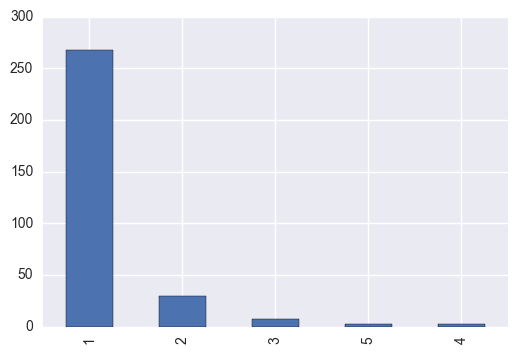

In [7]:
# Distribution of number of people in the vehicle involved in the crash
X[X['both']==1].PER_NO.value_counts().plot(kind='bar')
X[X['both']==1].PER_NO.value_counts()

13    19
3     17
25    16
8     14
12    13
16    12
22    12
10    11
14    11
18    10
6     10
9     10
11    10
1     10
26    10
28    10
20    10
7      9
4      9
31     9
21     9
27     8
17     8
23     7
30     7
19     7
29     7
2      7
5      6
15     6
24     5
Name: DAY, dtype: int64

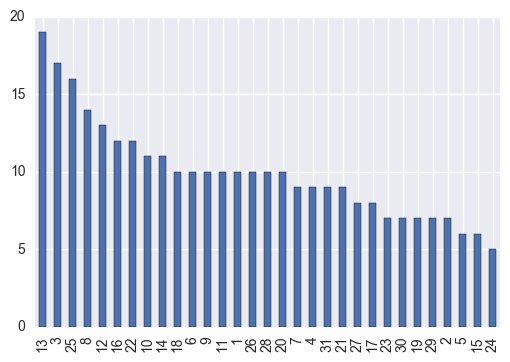

In [8]:
# Frequency distribution of days of a month involving crashes
X[X['both']==1].DAY.value_counts().plot(kind='bar')
X[X['both']==1].DAY.value_counts()

In [9]:
replacements = {
    'RUR_URB': {1:'Rural', 2:'Urban', 6:'Trafficway Not in State Inventory', 8:'Not Reported'},
    'SEX': {1:'Male', 2:'Female'}
    }
X.replace(replacements, regex=True, inplace=True)

Rural                                153
Urban                                140
Not Reported                          14
Trafficway Not in State Inventory      2
Name: RUR_URB, dtype: int64

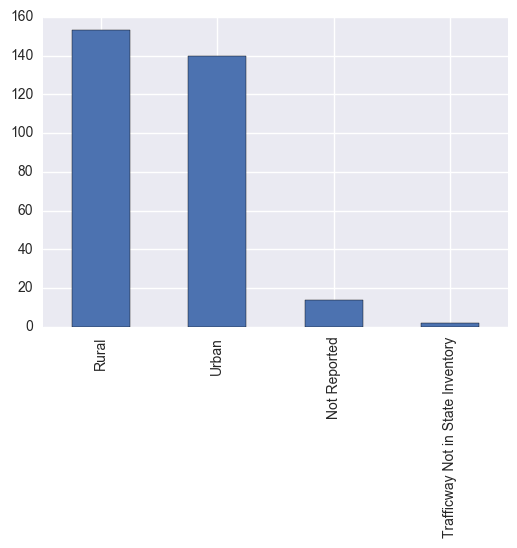

In [10]:
# Distribution of Urban/ Rural crashes
X[X['both']==1].RUR_URB.value_counts().plot(kind='bar')
X[X['both']==1].RUR_URB.value_counts()

Male      256
Female     53
Name: SEX, dtype: int64

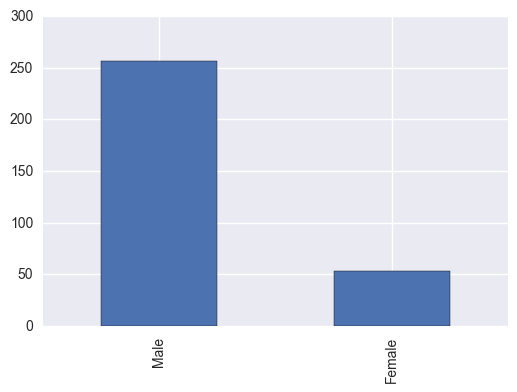

In [11]:
#Distirbution based on sex of person involved in the crash
X[X['both']==1].SEX.value_counts().plot(kind='bar')
X[X['both']==1].SEX.value_counts()

In [12]:
replacements = {
    'AGE': {39.27:'Not Reported', 1:'Less than one year'}
    }
X.replace(replacements, regex=True, inplace=True)

25.0    19
22.0    18
19.0    17
21.0    17
23.0    14
26.0    12
31.0    11
28.0    11
24.0    11
27.0    10
29.0     9
34.0     9
50.0     8
32.0     8
33.0     8
18.0     8
20.0     8
46.0     7
48.0     7
51.0     6
43.0     6
57.0     5
58.0     5
54.0     5
56.0     5
39.0     5
37.0     5
47.0     4
30.0     4
17.0     4
36.0     4
41.0     3
16.0     3
35.0     3
55.0     3
42.0     3
45.0     3
49.0     3
52.0     2
60.0     2
38.0     2
53.0     2
40.0     2
44.0     1
67.0     1
59.0     1
61.0     1
62.0     1
63.0     1
64.0     1
74.0     1
Name: AGE, dtype: int64

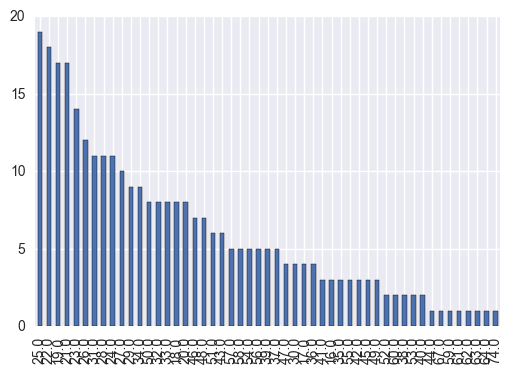

In [13]:
#Distribution based on age of the person
X[X['both']==1].AGE.value_counts().plot(kind='bar')
X[X['both']==1].AGE.value_counts()

Driver of a Motor Vehicle In-Transport       220
Passenger of a Motor Vehicle In-Transport     39
Pedestrian                                    39
Others                                        11
Name: PER_TYP, dtype: int64

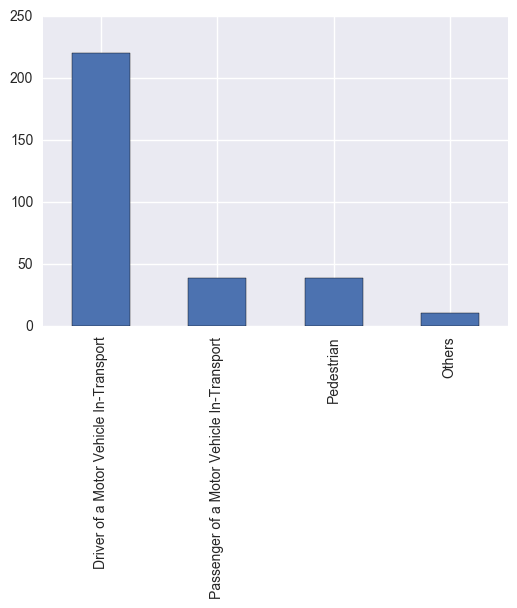

In [14]:
replacements = {
     'PER_TYP': {1:'Driver of a Motor Vehicle In-Transport', 2:'Passenger of a Motor Vehicle In-Transport',               
                5:'Pedestrian', 7:'Others'}
    }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on Type of the person
X[X['both']==1].PER_TYP.value_counts().plot(kind='bar')
X[X['both']==1].PER_TYP.value_counts()

Test Given        308
Test Not Given      1
Name: ALC_STATUS, dtype: int64

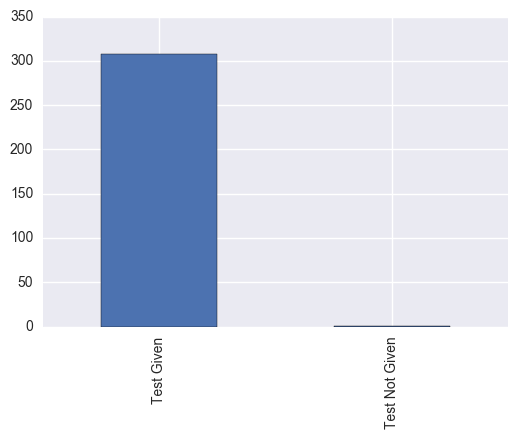

In [15]:
replacements = {
    'ALC_STATUS': {0:'Test Not Given', 2:'Test Given'}
    }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on if the person has given alcohol test or not
X[X['both']==1].ALC_STATUS.value_counts().plot(kind='bar')
X[X['both']==1].ALC_STATUS.value_counts()

Fatal Injury    309
Name: INJ_SEV, dtype: int64

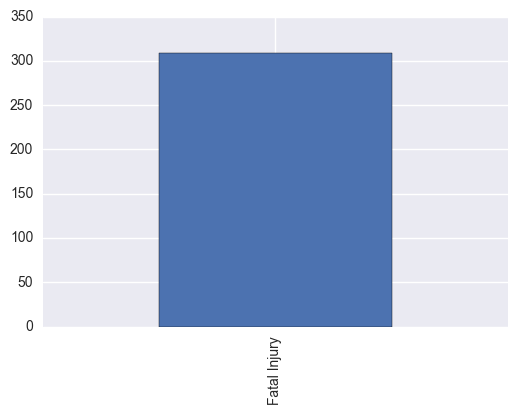

In [16]:
replacements = {
     'INJ_SEV': {0:'No Apparent Injury', 1:'Possible Injury', 2:'Suspected Minor Injury', 3:'Suspected Serious Injury',
                4:'Fatal Injury', 5:'Injured'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on injury of the person involved in the crash
X[X['both']==1].INJ_SEV.value_counts().plot(kind='bar')
X[X['both']==1].INJ_SEV.value_counts()

Yes             186
Not Reported     99
No               24
Name: DRINKING, dtype: int64

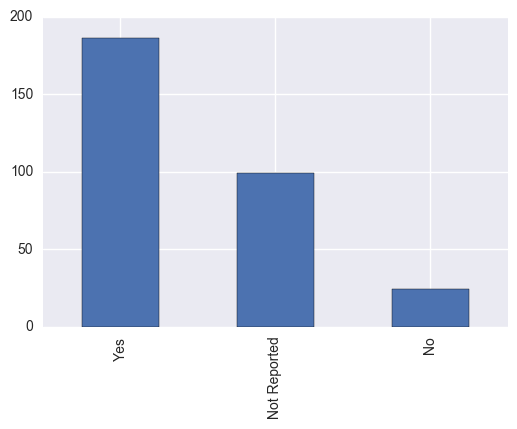

In [17]:
replacements = {
     'DRINKING': {0:'No', 1:'Yes', 8:'Not Reported'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on if the person was drining or not
X[X['both']==1].DRINKING.value_counts().plot(kind='bar')
X[X['both']==1].DRINKING.value_counts()

Not Reported       190
Evidential Test    101
observed            18
Name: ALC_DET, dtype: int64

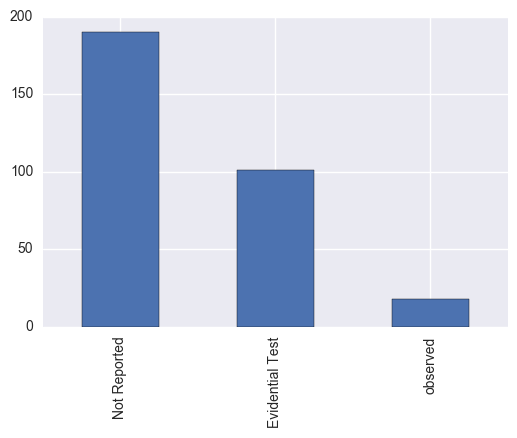

In [18]:
replacements = {
     'ALC_DET': {1:'Evidential Test',2:'Preliminary Breath Test', 3:'Behavioral', 4:'Passive Alcohol Sensor', 
                 5:'observed', 8:'Other', 9:'Not Reported',}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of alcohol test of the person involved in crash
X[X['both']==1].ALC_DET.value_counts().plot(kind='bar')
X[X['both']==1].ALC_DET.value_counts()

Blood Test           297
Vitreous               4
Unknown Test Type      3
Urine                  3
Not Reported           2
Name: ATST_TYP, dtype: int64

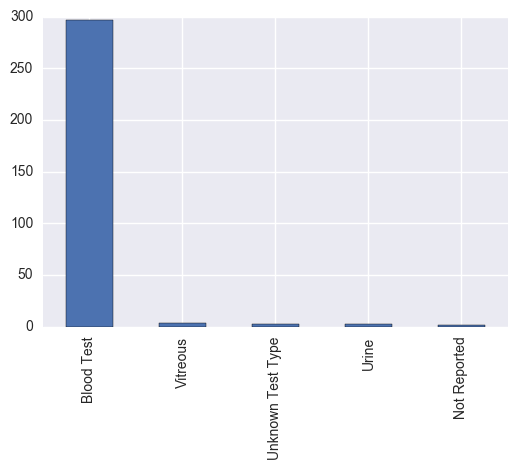

In [19]:
replacements = {
     'ATST_TYP': {1:'Blood Test',2:'Breath Test', 3:'Urine', 4:'Vitreous', 
                 5:'Blood Plasma', 8:'Other', 95:'Not Reported', 98:'Unknown Test Type'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of alcohol testtype of the person involved in crash
X[X['both']==1].ATST_TYP.value_counts().plot(kind='bar')
X[X['both']==1].ATST_TYP.value_counts()

Legally intoxicated    270
Below illegal limit     33
None Given               6
Name: ALC_RES, dtype: int64

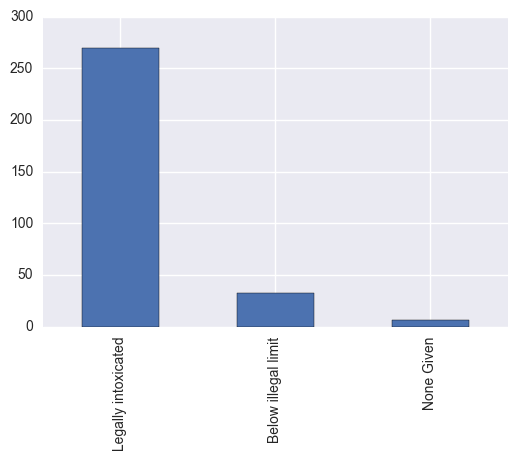

In [20]:
replacements = {
     'ALC_RES': {0.8:'Legally intoxicated',996:'None Given', 0:'Below illegal limit'}}
                 
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of alcohol test result of the person involved in crash
X[X['both']==1].ALC_RES.value_counts().plot(kind='bar')
X[X['both']==1].ALC_RES.value_counts()

Yes             107
Not Reported     79
No               62
Unknown          61
Name: DRUGS, dtype: int64

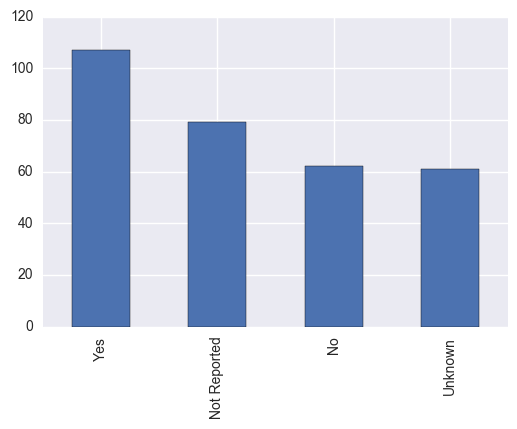

In [21]:
replacements = {
     'DRUGS': {0:'No', 1:'Yes', 8:'Not Reported', 9:'Unknown'}
    }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the if the person has take drug test or not
X[X['both']==1].DRUGS.value_counts().plot(kind='bar')
X[X['both']==1].DRUGS.value_counts()

Cannabinoid    241
Other Drugs     68
Name: DRUGRES1, dtype: int64

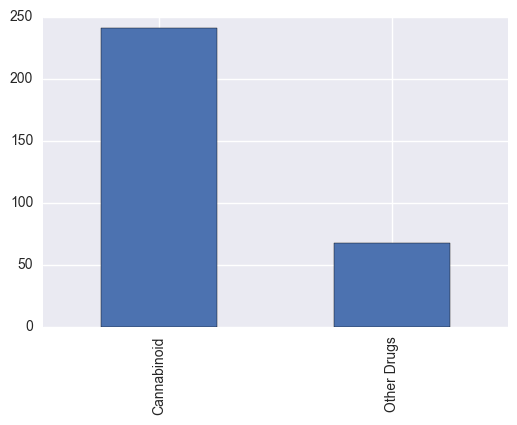

In [22]:
replacements = {
     'DRUGRES1': {0:'Not Tested for Drugs', 1:'Reported Negative', 95:'Not Reported', 695:'Cannabinoid', 996:'Other Drugs'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DRUGRES1.value_counts().plot(kind='bar')
X[X['both']==1].DRUGRES1.value_counts()

Not Tested for Drugs    149
Cannabinoid              96
Other Drugs              64
Name: DRUGRES2, dtype: int64

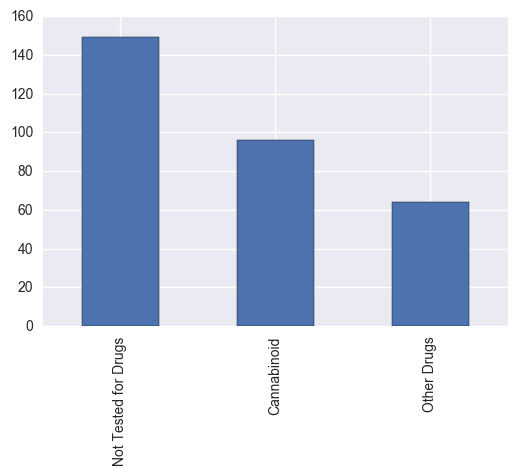

In [23]:
replacements = {
     'DRUGRES2': {0:'Not Tested for Drugs', 1:'Reported Negative', 95:'Not Reported', 695:'Cannabinoid', 996:'Other Drugs'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DRUGRES2.value_counts().plot(kind='bar')
X[X['both']==1].DRUGRES2.value_counts()

Not Tested for Drugs    247
Cannabinoid              40
Other Drugs              21
Reported Negative         1
Name: DRUGRES3, dtype: int64

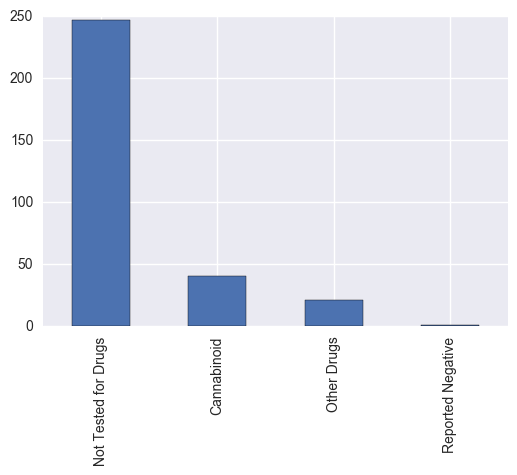

In [24]:
replacements = {
     'DRUGRES3': {0:'Not Tested for Drugs', 1:'Reported Negative', 95:'Not Reported', 695:'Cannabinoid', 996:'Other Drugs'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DRUGRES3.value_counts().plot(kind='bar')
X[X['both']==1].DRUGRES3.value_counts()

Died at Scene     229
Not Applicable     76
Died En Route       4
Name: DOA, dtype: int64

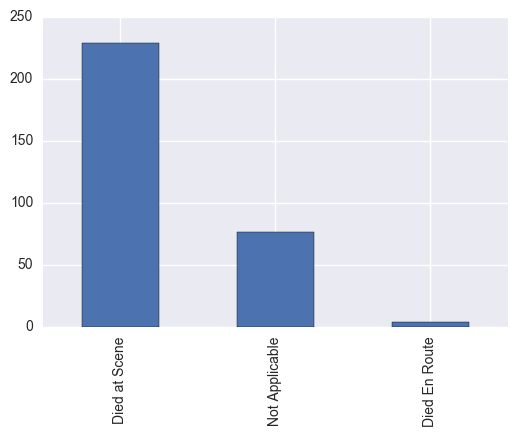

In [25]:
replacements = {
     'DOA': {0:'Not Applicable', 7:'Died at Scene', 8:'Died En Route'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DOA.value_counts().plot(kind='bar')
X[X['both']==1].DOA.value_counts()

13    17
25    15
3     14
8     14
14    14
22    13
12    13
1     12
10    12
6     11
16    11
26    11
11    10
28    10
18    10
9     10
20    10
21     9
19     9
23     8
31     8
27     8
7      8
4      8
17     7
29     7
2      7
15     6
5      6
30     6
24     4
88     1
Name: DEATH_DA, dtype: int64

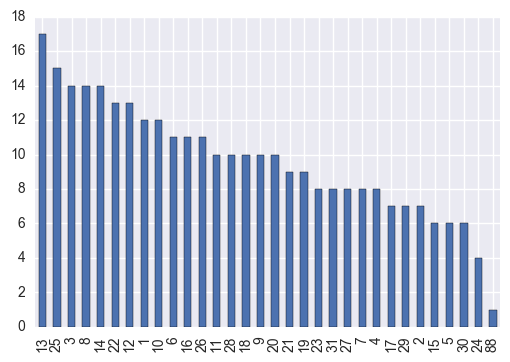

In [26]:
#Distribution based on day of month when death of person occured, as reported by authorities
X[X['both']==1].DEATH_DA.value_counts().plot(kind='bar')
X[X['both']==1].DEATH_DA.value_counts()

In [27]:
replacements = {
     'DEATH_DA': {88:'Not reported'}
          }
X.replace(replacements, regex=True, inplace=True)

3     37
8     35
5     32
4     32
11    28
10    28
9     28
1     22
7     20
6     19
12    14
2     13
88     1
Name: DEATH_MO, dtype: int64

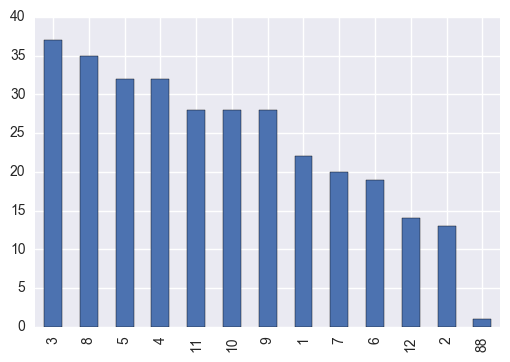

In [28]:
#Distribution based on the month of death
X[X['both']==1].DEATH_MO.value_counts().plot(kind='bar')
X[X['both']==1].DEATH_MO.value_counts()

In [29]:
replacements = {
     'DEATH_MO': {88:'Not reported'}
          }
X.replace(replacements, regex=True, inplace=True)

No                285
Not Applicable     23
Yes                 1
Name: WORK_INJ, dtype: int64

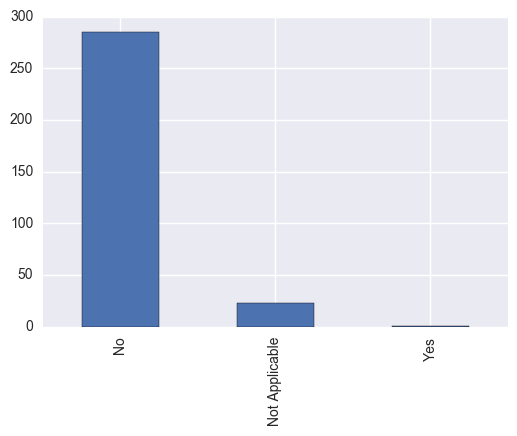

In [30]:
replacements = {
     'WORK_INJ': {0:'No', 1:'Yes', 8:'Not Applicable'},
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on if the crash occured when the preson was at work
X[X['both']==1].WORK_INJ.value_counts().plot(kind='bar')
X[X['both']==1].WORK_INJ.value_counts()

White              207
Black               55
All Other Races     42
Asian                5
Name: RACE, dtype: int64

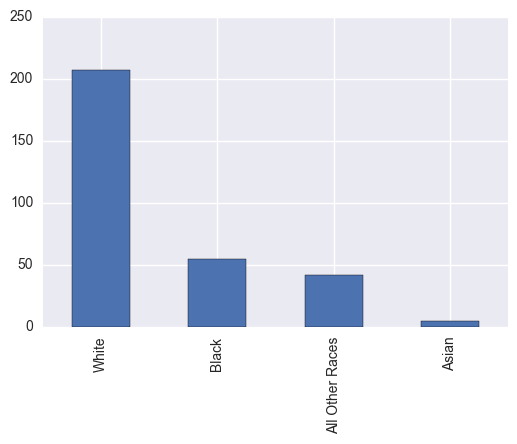

In [31]:
replacements = {
     'RACE': {0:'Not A Fatality', 1:'White', 2:'Black',98:'All Other Races', 8:'Asian'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the Race of the person
X[X['both']==1].RACE.value_counts().plot(kind='bar')
X[X['both']==1].RACE.value_counts()

California        28
South Carolina    24
Florida           19
New York          15
Texas             15
Michigan          14
Kentucky          13
Ohio              12
Washington        11
Missouri          11
Illinois          10
Colorado          10
Nevada            10
Georgia           10
Virginia           9
Pennsylvania       9
Indiana            9
Alabama            7
Wisconsin          7
Tennessee          7
Louisiana          6
Nebraska           4
Mississippi        4
Minnesota          4
New Jersey         4
Arizona            4
New Mexico         4
New Hampshire      3
Connecticut        3
Alaska             3
Arkansas           3
Kansas             3
Idaho              3
WestVirginia       2
Vermont            2
Utah               1
Hawaii             1
Montana            1
Delaware           1
Massachusetts      1
Iowa               1
Wyoming            1
Name: STATE, dtype: int64

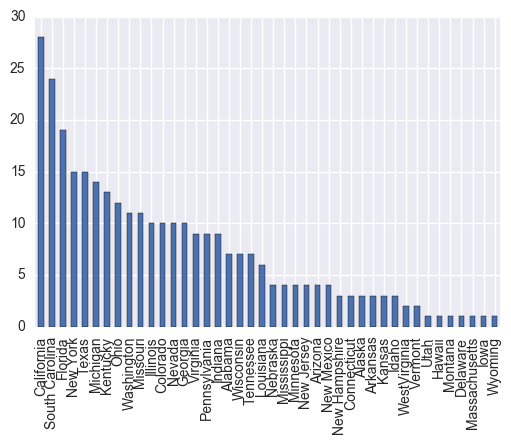

In [32]:
replacements = {
     'STATE': {1:'Alabama', 31:'Nebraska', 2:'Alaska', 32:'Nevada',4:'Arizona', 33:'New Hampshire', 5:'Arkansas', 34:'New Jersey',
             6: 'California', 35:'New Mexico', 8:'Colorado', 36:'New York', 9:'Connecticut', 37:'North Carolina', 10:'Delaware',
             38:'North Dakota', 11:'District of Columbia', 39:'Ohio', 12:'Florida', 40:'Oklahoma', 13:'Georgia', 41:'Oregon',
             15:'Hawaii', 42:'Pennsylvania', 16:'Idaho', 43:'Puerto Rico', 17:'Illinois', 44:'Rhode Island', 18:'Indiana',
             45:'South Carolina', 19:'Iowa', 46:'South Dakota', 20:'Kansas', 47:'Tennessee', 21:'Kentucky', 48:'Texas', 
             22:'Louisiana', 49:'Utah', 23:'Maine', 50:'Vermont', 24:'Maryland', 52:'Virgin Islands', 25:'Massachusetts', 
             51:'Virginia', 26:'Michigan', 53:'Washington', 27:'Minnesota', 54:'WestVirginia', 28:'Mississippi',
             55:'Wisconsin', 29:'Missouri', 56:'Wyoming', 30:'Montana'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on STATE
X[X['both']==1].STATE.value_counts().plot(kind='bar')
X[X['both']==1].STATE.value_counts()

### Continuing further analysis on Project_analysis-actual-total.ipynb